In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Load the dataset
df = pd.read_csv('accident_train.csv')

# Prepare the data
X = df.drop('Severity', axis=1)  # Features
y = df['Severity']  # Target variable

# Handle categorical features (one-hot encoding)
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Ensure X_test has the same columns as X_train (fill missing columns with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Additional metrics (e.g., precision, recall, etc.)
print(classification_report(y_test, y_pred))

Accuracy: 82.58%
              precision    recall  f1-score   support

           1       0.60      0.23      0.33       167
           2       0.84      0.96      0.90     16007
           3       0.64      0.32      0.43      3275
           4       0.41      0.02      0.03       551

    accuracy                           0.83     20000
   macro avg       0.62      0.38      0.42     20000
weighted avg       0.80      0.83      0.79     20000



In [3]:
import random
import pandas as pd

# Function to generate random input (same as before)
def generate_random_input():
    random_input = {
        'Temperature(F)': random.uniform(-30, 110),
        'Wind_Chill(F)': random.uniform(-50, 100),
        'Humidity(%)': random.randint(0, 100),
        'Pressure(in)': random.uniform(28, 31),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 60),
        'Precipitation(in)': random.uniform(0, 1),
        'Amenity': random.choice([0, 1]),
        'Bump': random.choice([0, 1]),
        'Crossing': random.choice([0, 1]),
        'Junction': random.choice([0, 1]),
        'Station': random.choice([0, 1]),
        'Stop': random.choice([0, 1]),
        'Traffic_Signal': random.choice([0, 1]),
        'Sunrise_Sunset': random.choice(['Day', 'Night']),
        'Wind_Direction_CALM': random.choice([0, 1]),
        'Wind_Direction_Calm': random.choice([0, 1]),
        'Wind_Direction_E': random.choice([0, 1]),
        'Wind_Direction_ENE': random.choice([0, 1]),
        'Wind_Direction_ESE': random.choice([0, 1]),
        'Wind_Direction_East': random.choice([0, 1]),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_NE': random.choice([0, 1]),
        'Wind_Direction_NNE': random.choice([0, 1]),
        'Wind_Direction_NNW': random.choice([0, 1]),
        'Wind_Direction_NW': random.choice([0, 1]),
        'Wind_Direction_North': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Wind_Direction_SE': random.choice([0, 1]),
        'Wind_Direction_SSE': random.choice([0, 1]),
        'Wind_Direction_SSW': random.choice([0, 1]),
        'Wind_Direction_SW': random.choice([0, 1]),
        'Wind_Direction_South': random.choice([0, 1]),
        'Wind_Direction_VAR': random.choice([0, 1]),
        'Wind_Direction_Variable': random.choice([0, 1]),
        'Wind_Direction_W': random.choice([0, 1]),
        'Wind_Direction_WNW': random.choice([0, 1]),
        'Wind_Direction_WSW': random.choice([0, 1]),
        'Wind_Direction_West': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Cloudy': random.choice([0, 1]),
        'Weather_Condition_Fog': random.choice([0, 1]),
        'Weather_Condition_Freezing Conditions': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1]),
        'Weather_Condition_Snow': random.choice([0, 1]),
        'Weather_Condition_Thunderstorm': random.choice([0, 1]),
        'Weather_Condition_Unknown': random.choice([0, 1])
    }

    if random.random() < 0.33:  # 33% chance for "Light"
        random_input['Temperature(F)'] = random.uniform(70, 100)
        random_input['Precipitation(in)'] = random.uniform(0, 0.1)
        random_input['Wind_Speed(mph)'] = random.uniform(0, 20)
    elif random.random() < 0.66:  # 33% chance for "Moderate"
        random_input['Temperature(F)'] = random.uniform(50, 80)
        random_input['Precipitation(in)'] = random.uniform(0.1, 0.3)
        random_input['Wind_Speed(mph)'] = random.uniform(20, 40)
    else:  # 33% chance for "Severe"
        random_input['Temperature(F)'] = random.uniform(30, 50)
        random_input['Precipitation(in)'] = random.uniform(0.5, 1)
        random_input['Wind_Speed(mph)'] = random.uniform(40, 60)

    return random_input

# Function to preprocess input data
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    return input_df

# Function to predict severity
def predict_severity(input_data):
    preprocessed_data = preprocess_input(input_data)
    prediction = rf_model.predict(preprocessed_data)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe'}
    severity = severity_map.get(prediction[0], 'Unknown')
    return severity

# Generate a random input and predict the severity
for i in range(5):  # Predict 5 times with different random inputs
    random_input = generate_random_input()  # Generate a random input
    predicted_severity = predict_severity(random_input)  # Predict the severity
    print(f"Random Input {i+1}: {random_input}")
    print(f"Predicted Severity: {predicted_severity}\n")


Random Input 1: {'Temperature(F)': 85.00355610758962, 'Wind_Chill(F)': -7.5357638353432534, 'Humidity(%)': 82, 'Pressure(in)': 28.627135238696518, 'Visibility(mi)': 3.0269570159549435, 'Wind_Speed(mph)': 3.6846616176923597, 'Precipitation(in)': 0.07939057343348678, 'Amenity': 1, 'Bump': 0, 'Crossing': 0, 'Junction': 1, 'Station': 1, 'Stop': 1, 'Traffic_Signal': 1, 'Sunrise_Sunset': 'Night', 'Wind_Direction_CALM': 1, 'Wind_Direction_Calm': 0, 'Wind_Direction_E': 0, 'Wind_Direction_ENE': 1, 'Wind_Direction_ESE': 1, 'Wind_Direction_East': 0, 'Wind_Direction_N': 0, 'Wind_Direction_NE': 0, 'Wind_Direction_NNE': 0, 'Wind_Direction_NNW': 0, 'Wind_Direction_NW': 1, 'Wind_Direction_North': 0, 'Wind_Direction_S': 0, 'Wind_Direction_SE': 0, 'Wind_Direction_SSE': 0, 'Wind_Direction_SSW': 1, 'Wind_Direction_SW': 1, 'Wind_Direction_South': 0, 'Wind_Direction_VAR': 0, 'Wind_Direction_Variable': 1, 'Wind_Direction_W': 0, 'Wind_Direction_WNW': 0, 'Wind_Direction_WSW': 1, 'Wind_Direction_West': 0, 'Weat

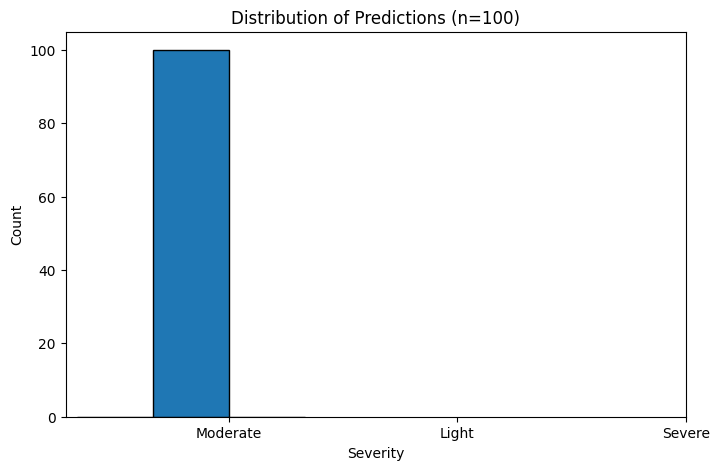

In [4]:
import matplotlib.pyplot as plt

# Function to predict multiple times and collect results
def predict_multiple_times(num_predictions=100):
    predictions = []

    for _ in range(num_predictions):
        random_input = generate_random_input()
        predicted_severity = predict_severity(random_input)
        predictions.append(predicted_severity)

    # Plot the distribution of predictions
    plt.figure(figsize=(8, 5))
    plt.hist(predictions, bins=3, edgecolor='black', align='left')
    plt.title(f'Distribution of Predictions (n={num_predictions})')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks(['Light', 'Moderate', 'Severe'])
    plt.show()

# Run and visualize the prediction distribution for 100 iterations
predict_multiple_times(100)


In [5]:
import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Sample Model Training Data (Balanced for Severity classes)
data = {
    'Temperature(F)': [85, 92, 70, 60, 50, 105, 80],
    'Wind_Chill(F)': [75, 85, 68, 59, 40, 110, 78],
    'Humidity(%)': [45, 50, 60, 65, 80, 55, 50],
    'Pressure(in)': [30.0, 29.8, 30.5, 30.2, 29.9, 30.1, 30.3],
    'Visibility(mi)': [10, 5, 8, 12, 20, 2, 7],
    'Wind_Speed(mph)': [15, 20, 12, 10, 25, 30, 10],
    'Precipitation(in)': [0.1, 0.0, 0.2, 0.0, 0.3, 0.1, 0.2],
    'Wind_Direction_N': [0, 0, 1, 0, 0, 0, 1],  # Example with binary wind directions
    'Wind_Direction_S': [0, 1, 0, 0, 1, 0, 0],
    'Weather_Condition_Clear': [1, 0, 0, 1, 0, 0, 1],  # Example with binary weather conditions
    'Weather_Condition_Rain': [0, 1, 0, 0, 1, 0, 0],
    'Severity': [3, 4, 3, 4, 3, 4, 2]  # Severe (3), Light (4), Moderate (2)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and Target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Function to generate random input
def generate_random_input():
    # Generate random values for the input, based on your provided binary subcategories
    random_input = {
        'Temperature(F)': random.uniform(-30, 110),
        'Wind_Chill(F)': random.uniform(-50, 100),
        'Humidity(%)': random.randint(0, 100),
        'Pressure(in)': random.uniform(28, 31),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 60),
        'Precipitation(in)': random.uniform(0, 1),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1])
    }
    return random_input

# Function to preprocess input data (convert it to DataFrame format)
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    return input_df

# Function to predict severity
def predict_severity(input_data):
    preprocessed_data = preprocess_input(input_data)
    prediction = rf_model.predict(preprocessed_data)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe', 4: 'Unknown'}
    severity = severity_map.get(prediction[0], 'Unknown')
    return severity

# Test the prediction multiple times
for _ in range(5):
    random_input = generate_random_input()
    predicted_severity = predict_severity(random_input)
    print(f"Random Input: {random_input}")
    print(f"Predicted Severity: {predicted_severity}\n")


Random Input: {'Temperature(F)': 91.86925080703296, 'Wind_Chill(F)': 5.049391305320242, 'Humidity(%)': 9, 'Pressure(in)': 28.05973410076948, 'Visibility(mi)': 9.275825879272965, 'Wind_Speed(mph)': 20.93156361364347, 'Precipitation(in)': 0.0223081762705849, 'Wind_Direction_N': 1, 'Wind_Direction_S': 1, 'Weather_Condition_Clear': 0, 'Weather_Condition_Rain': 0}
Predicted Severity: Unknown

Random Input: {'Temperature(F)': -11.136953112681297, 'Wind_Chill(F)': 11.352146067660286, 'Humidity(%)': 100, 'Pressure(in)': 30.545114798524306, 'Visibility(mi)': 13.28002070301899, 'Wind_Speed(mph)': 21.832574011875174, 'Precipitation(in)': 0.12414633105407247, 'Wind_Direction_N': 0, 'Wind_Direction_S': 1, 'Weather_Condition_Clear': 0, 'Weather_Condition_Rain': 0}
Predicted Severity: Severe

Random Input: {'Temperature(F)': -19.006632773705824, 'Wind_Chill(F)': 97.89305062203499, 'Humidity(%)': 96, 'Pressure(in)': 30.635044410938043, 'Visibility(mi)': 11.672217824283784, 'Wind_Speed(mph)': 44.594507

In [10]:
import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Sample Model Training Data (Balanced for Severity classes)
data = {
    'Temperature(F)': [85, 92, 70, 60, 50, 105, 80],
    'Wind_Chill(F)': [75, 85, 68, 59, 40, 110, 78],
    'Humidity(%)': [45, 50, 60, 65, 80, 55, 50],
    'Pressure(in)': [30.0, 29.8, 30.5, 30.2, 29.9, 30.1, 30.3],
    'Visibility(mi)': [10, 5, 8, 12, 20, 2, 7],
    'Wind_Speed(mph)': [15, 20, 12, 10, 25, 30, 10],
    'Precipitation(in)': [0.1, 0.0, 0.2, 0.0, 0.3, 0.1, 0.2],
    'Wind_Direction_N': [0, 0, 1, 0, 0, 0, 1],  # Example with binary wind directions
    'Wind_Direction_S': [0, 1, 0, 0, 1, 0, 0],
    'Weather_Condition_Clear': [1, 0, 0, 1, 0, 0, 1],  # Example with binary weather conditions
    'Weather_Condition_Rain': [0, 1, 0, 0, 1, 0, 0],
    'Severity': [3, 4, 3, 4, 3, 4, 2]  # Severe (3), Light (4), Moderate (2)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and Target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Function to generate random input
def generate_random_input():
    # Generate random values for the input, based on your provided binary subcategories
    random_input = {
        'Temperature(F)': random.uniform(-30, 110),
        'Wind_Chill(F)': random.uniform(-50, 100),
        'Humidity(%)': random.randint(0, 100),
        'Pressure(in)': random.uniform(28, 31),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 60),
        'Precipitation(in)': random.uniform(0, 1),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1])
    }
    return random_input

# Function to preprocess input data (convert it to DataFrame format)
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    return input_df

# Function to predict severity
def predict_severity(input_data):
    preprocessed_data = preprocess_input(input_data)
    prediction = rf_model.predict(preprocessed_data)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe', 4: 'Unknown'}
    severity = severity_map.get(prediction[0], 'Unknown')
    return severity

# Test the prediction multiple times
for _ in range(5):
    random_input = generate_random_input()
    predicted_severity = predict_severity(random_input)
    print(f"Random Input: {random_input}")
    print(f"Predicted Severity: {predicted_severity}\n")


Random Input: {'Temperature(F)': 37.92239407970129, 'Wind_Chill(F)': -11.353132254083867, 'Humidity(%)': 51, 'Pressure(in)': 28.944188520143676, 'Visibility(mi)': 13.153693414969315, 'Wind_Speed(mph)': 44.56569090492124, 'Precipitation(in)': 0.5365462331456213, 'Wind_Direction_N': 0, 'Wind_Direction_S': 1, 'Weather_Condition_Clear': 0, 'Weather_Condition_Rain': 1}
Predicted Severity: Severe

Random Input: {'Temperature(F)': -13.34867717529788, 'Wind_Chill(F)': 30.077635752615194, 'Humidity(%)': 16, 'Pressure(in)': 30.67777434554917, 'Visibility(mi)': 2.2096531375483752, 'Wind_Speed(mph)': 16.90833636924536, 'Precipitation(in)': 0.09157379519299369, 'Wind_Direction_N': 1, 'Wind_Direction_S': 0, 'Weather_Condition_Clear': 1, 'Weather_Condition_Rain': 1}
Predicted Severity: Severe

Random Input: {'Temperature(F)': 36.36406305557951, 'Wind_Chill(F)': -30.130322654322082, 'Humidity(%)': 21, 'Pressure(in)': 28.11723441588073, 'Visibility(mi)': 5.585360633431495, 'Wind_Speed(mph)': 14.0670310

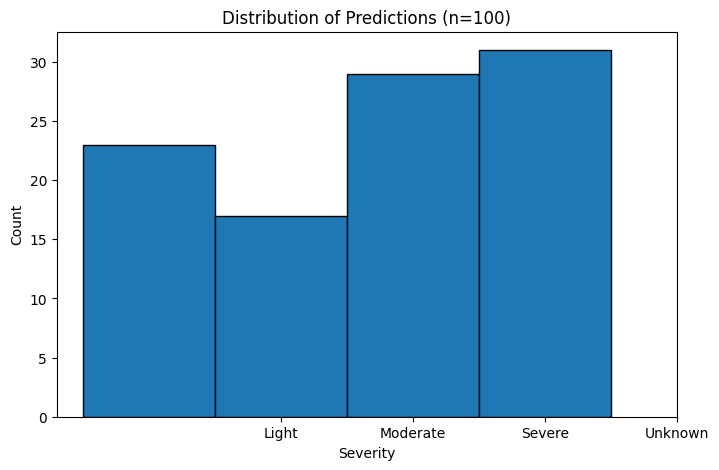

In [11]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

# Sample Balanced Data for Training
data = {
    'Temperature(F)': [85, 92, 70, 60, 50, 105, 80],
    'Wind_Chill(F)': [75, 85, 68, 59, 40, 110, 78],
    'Humidity(%)': [45, 50, 60, 65, 80, 55, 50],
    'Pressure(in)': [30.0, 29.8, 30.5, 30.2, 29.9, 30.1, 30.3],
    'Visibility(mi)': [10, 5, 8, 12, 20, 2, 7],
    'Wind_Speed(mph)': [15, 20, 12, 10, 25, 30, 10],
    'Precipitation(in)': [0.1, 0.0, 0.2, 0.0, 0.3, 0.1, 0.2],
    'Wind_Direction_N': [0, 0, 1, 0, 0, 0, 1],
    'Wind_Direction_S': [0, 1, 0, 0, 1, 0, 0],
    'Weather_Condition_Clear': [1, 0, 0, 1, 0, 0, 1],
    'Weather_Condition_Rain': [0, 1, 0, 0, 1, 0, 0],
    'Severity': [1, 2, 3, 3, 4, 1, 2]  # Balanced target
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: weight for i, weight in zip(np.unique(y), class_weights)}

# Train a Random Forest with class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)
rf_model.fit(X, y)

# Function to generate random input
def generate_random_input():
    random_input = {
        'Temperature(F)': random.uniform(40, 110),
        'Wind_Chill(F)': random.uniform(35, 100),
        'Humidity(%)': random.randint(20, 100),
        'Pressure(in)': random.uniform(28.5, 31.0),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 50),
        'Precipitation(in)': random.uniform(0, 0.5),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1])
    }
    return random_input

# Function to predict severity
def predict_severity(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = rf_model.predict(input_df)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe', 4: 'Unknown'}
    severity = severity_map.get(prediction[0], 'Unknown')
    return severity

# Function to predict multiple times and plot distribution
def predict_multiple_times(num_predictions=100):
    predictions = []

    for _ in range(num_predictions):
        random_input = generate_random_input()
        predicted_severity = predict_severity(random_input)
        predictions.append(predicted_severity)

    # Plot the distribution of predictions
    plt.figure(figsize=(8, 5))
    plt.hist(predictions, bins=np.arange(5) - 0.5, edgecolor='black')
    plt.title(f'Distribution of Predictions (n={num_predictions})')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks([1, 2, 3, 4], ['Light', 'Moderate', 'Severe', 'Unknown'])
    plt.show()

# Test prediction distribution
predict_multiple_times(100)


In [13]:
import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Balanced dataset
data = {
    'Temperature(F)': [85, 92, 70, 60, 50, 105, 80, 72, 66, 40],
    'Wind_Chill(F)': [75, 85, 68, 59, 40, 110, 78, 60, 62, 35],
    'Humidity(%)': [45, 50, 60, 65, 80, 55, 50, 70, 48, 55],
    'Pressure(in)': [30.0, 29.8, 30.5, 30.2, 29.9, 30.1, 30.3, 30.4, 29.7, 29.9],
    'Visibility(mi)': [10, 5, 8, 12, 20, 2, 7, 15, 9, 6],
    'Wind_Speed(mph)': [15, 20, 12, 10, 25, 30, 10, 5, 18, 22],
    'Precipitation(in)': [0.1, 0.0, 0.2, 0.0, 0.3, 0.1, 0.2, 0.0, 0.3, 0.05],
    'Wind_Direction_N': [0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
    'Wind_Direction_S': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    'Weather_Condition_Clear': [1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
    'Weather_Condition_Rain': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    'Severity': [1, 2, 3, 4, 1, 2, 3, 4, 2, 1]  # Balanced severity classes
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and Target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X, y)

# Function to generate balanced random input
def generate_balanced_random_input():
    return {
        'Temperature(F)': random.uniform(30, 110),
        'Wind_Chill(F)': random.uniform(20, 100),
        'Humidity(%)': random.randint(30, 90),
        'Pressure(in)': random.uniform(29, 31),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 50),
        'Precipitation(in)': random.uniform(0, 0.5),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1])
    }

# Function to predict severity
def predict_severity(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = rf_model.predict(input_df)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe', 4: 'Unknown'}
    return severity_map.get(prediction[0], 'Unknown')

# Test predictions with balanced random inputs
for i in range(5):
    random_input = generate_balanced_random_input()
    prediction = predict_severity(random_input)
    print(f"Random Input {i + 1}: {random_input}")
    print(f"Predicted Severity: {prediction}\n")


Random Input 1: {'Temperature(F)': 36.199155877532775, 'Wind_Chill(F)': 74.50940288826601, 'Humidity(%)': 83, 'Pressure(in)': 30.179974890477425, 'Visibility(mi)': 11.085196325283142, 'Wind_Speed(mph)': 14.908085095189088, 'Precipitation(in)': 0.18811881585496798, 'Wind_Direction_N': 1, 'Wind_Direction_S': 1, 'Weather_Condition_Clear': 1, 'Weather_Condition_Rain': 1}
Predicted Severity: Light

Random Input 2: {'Temperature(F)': 105.1290380118415, 'Wind_Chill(F)': 49.22125419001173, 'Humidity(%)': 35, 'Pressure(in)': 29.802740431281133, 'Visibility(mi)': 8.245398386855388, 'Wind_Speed(mph)': 19.82456728440637, 'Precipitation(in)': 0.37321224815527665, 'Wind_Direction_N': 0, 'Wind_Direction_S': 0, 'Weather_Condition_Clear': 1, 'Weather_Condition_Rain': 1}
Predicted Severity: Light

Random Input 3: {'Temperature(F)': 47.49351077352272, 'Wind_Chill(F)': 40.28450800893572, 'Humidity(%)': 53, 'Pressure(in)': 30.82252546177999, 'Visibility(mi)': 7.757129419518962, 'Wind_Speed(mph)': 12.176361